# Optimizing silent reporters

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# my module imports
from optimalcodon.projects.rnastability.predictdecay import predict_sequence
from optimalcodon.projects.rnastability.optimization import protein_optimization

In [2]:
data_fi3bcd_wu_et_al = {
    'seqs': [
        'atggtttcaaaaggagaagaagataatatggcgataattaaagaatttatgaggtttaaagttcatatggaagggtcagttaatgggcatgaatttgaaatagaaggagaaggagaagggagaccatacgaagggacacaaacagctaaacttaaagttacaaaaggaggaccacttccatttgcatgggatatactttcaccacaatttatgtacgggtcaaaagcttacgttaaacatccagctgatataccagattaccttaaactttcatttccagaagggtttaaatgggaaagggttatgaattttgaagatggaggagttgttacagttacacaagattcatcacttcaagatggagaatttatatacaaagttaaacttagagggacaaattttccatcagatgggccagttatgcaaaaaaaaacaatgggatgggaagcgtcatcagaaaggatgtacccagaagatggggcacttaaaggggaaattaaacaaaggcttaaacttaaagatggagggcattacgatgctgaagttaaaacaacatacaaagctaaaaaaccagttcaacttccaggggcatacaatgttaatattaaacttgatataacatcacataatgaagattacacaatagttgaacaatacgaaagggcagaagggaggcattcaacaggagggatggatgaactttacaaaGGAAGCGGAGCTACTAACTTCAGCCTGCTGAAGCAGGCTGGAGACGTGGAGGAGAACCCTGGACCTCTCGAGCGCCACCAGTCCTTCTGCGACGAGGTCTTCGTCTGCTCCGACGAGCTCAAGGTCGAACTCTCCAAGTGCCCCTGCAAGTACATCTCCCCCCACAACCCCGAACCCCAGACGCTCACGTACAACAAGCGCGTCGACAACCTCCGCATCCAGTTCCAGCGCTTCACGATCATCACGGACAACTACCACTACCACCGCGAATCCCACGACCACACGAAGGTCCTCGACCTCGTCAACTTCGAGATCGACGAAACGCAGTCCGACAACTGCAAGCAGCACTGCTACATCCAGCGCTCCTACGTCCGCATCAACGAGTCCAAGAACCCCCGCCCCACGATCTTCTTCTACTTCCCCCACTGCCTCGTCCCCCAGACGTGCTACAAGCTCCGCACGTGCTTCTGCGACGACGAGGTCCCCGAAGTCTCCAAGTGCGTCCCCTACCCCTGCATCTCCAACGACCAGCTCCACAAGCGCACGCTCTACGACCACCACTTCGAAATCCACTACCCCCAGAACGTCTACACGGAGAAGCAGAAGTCCCGCCAGAACATCTTCCGCACGCTCATCTCCTTCCTCAACCGCGACAAGACGCAGAACGTCAACCGCGAACGCTGCAACAACCACTCCCAGCCCCCCAAGGAGAAGGACGAACTCCACCCCCCCTTCATCTACATCACGTCCTGCTTCCTCAAGTACCGCCACGAGTTCGACTGCTGCTTCCAGGACATCCAGCTCATCCACGTCTCTAGAGATTACAAAGATGACGACGATAAATGA',
        'AtggtttcaaaaggagaagaagataatatggcgataattaaagaatttatgaggtttaaagttcatatggaagggtcagttaatgggcatgaatttgaaatagaaggagaaggagaagggagaccatacgaagggacacaaacagctaaacttaaagttacaaaaggaggaccacttccatttgcatgggatatactttcaccacaatttatgtacgggtcaaaagcttacgttaaacatccagctgatataccagattaccttaaactttcatttccagaagggtttaaatgggaaagggttatgaattttgaagatggaggagttgttacagttacacaagattcatcacttcaagatggagaatttatatacaaagttaaacttagagggacaaattttccatcagatgggccagttatgcaaaaaaaaacaatgggatgggaagcgtcatcagaaaggatgtacccagaagatggggcacttaaaggggaaattaaacaaaggcttaaacttaaagatggagggcattacgatgctgaagttaaaacaacatacaaagctaaaaaaccagttcaacttccaggggcatacaatgttaatattaaacttgatataacatcacataatgaagattacacaatagttgaacaatacgaaagggcagaagggaggcattcaacaggagggatggatgaactttacaaaGGAAGCGGAGCTACTAACTTCAGCCTGCTGAAGCAGGCTGGAGACGTGGAGGAGAACCCTGGACCTCTCGAGAGACACcagTCCTTCTGCGACGAGGTAttcGTCTGCAGTgacGAGCTCAAAGTCGAACTCTCCaagTGTCCCtgcAAGTATATCtccCCACACAACCCCGAAcccCAAACGctcACGTACAACAAGAGAgtcGACAATctcCGCATACAGttcCAGCGCTTCACAATCatcACAGATAATTACcacTATcacAGAGAATCCCACgacCATACGaagGTActcGACCTCGTCAACTTTGAGATCgacGAAACGCAAtccGACAATtgcAAGCAGCATTGCtacATACAGCGCtccTATGTCcgcATAAACGAGTCCAAGaacCCACGCCCCacgATCTTTTTCTACTTCcccCACTGTCTCgtcCCCCAAacgTGCTACAAActcAGAACGtgcTTTtgcGATGACGAGgtcCCCGAAGTAtccAAATGCgtcCCCtacCCATGCATCTCCaacGACCAGCTCCATAAGcgcACActcTACGATCACcacTTCGAAATCCACTACCCAcagAATGTCtacACGGAGAAGCAAaagAGTCGCCAGAACatcTTTCGCacgCTCATATCCTTCctcAACAGAGACaagACGCAAaacGTCAATcgcGAACGCTGTAACAACCACtccCAACCACCCAAAGAGAAGgacGAATTACACcccCCCTTTATCtacATAacgTCCTGCTTCCTCAAGTACCGCCATGAGTTCgacTGCTGTttcCAGGACATCCAGCTCATAcacGTATCTAGAGATTACAAAGATGACGACGATAAATGA',
        'AtggtttcaaaaggagaagaagataatatggcgataattaaagaatttatgaggtttaaagttcatatggaagggtcagttaatgggcatgaatttgaaatagaaggagaaggagaagggagaccatacgaagggacacaaacagctaaacttaaagttacaaaaggaggaccacttccatttgcatgggatatactttcaccacaatttatgtacgggtcaaaagcttacgttaaacatccagctgatataccagattaccttaaactttcatttccagaagggtttaaatgggaaagggttatgaattttgaagatggaggagttgttacagttacacaagattcatcacttcaagatggagaatttatatacaaagttaaacttagagggacaaattttccatcagatgggccagttatgcaaaaaaaaacaatgggatgggaagcgtcatcagaaaggatgtacccagaagatggggcacttaaaggggaaattaaacaaaggcttaaacttaaagatggagggcattacgatgctgaagttaaaacaacatacaaagctaaaaaaccagttcaacttccaggggcatacaatgttaatattaaacttgatataacatcacataatgaagattacacaatagttgaacaatacgaaagggcagaagggaggcattcaacaggagggatggatgaactttacaaaGGAAGCGGAGCTACTAACTTCAGCCTGCTGAAGCAGGCTGGAGACGTGGAGGAGAACCCTGGACCTCTCGAGAGACACCAATCCTTCTGCGACGAGGTATTTGTCTGCAGTGATGAGCTCAAAGTCGAACTCTCCAAATGTCCCTGTAAGTATATCAGTCCACACAACCCCGAACCACAAACGTTAACGTACAACAAGAGAGTAGACAATTTACGCATACAGTTTCAGCGCTTCACAATCATAACAGATAATTACCATTATCATAGAGAATCCCACGATCATACGAAAGTATTAGACCTCGTCAACTTTGAGATCGATGAAACGCAAAGTGACAATTGTAAGCAGCATTGCTATATACAGCGCAGTTATGTCAGAATAAACGAGTCCAAGAATCCACGCCCCACAATCTTTTTCTACTTCCCACACTGTCTCGTACCCCAAACATGCTACAAATTAAGAACGTGTTTTTGTGATGACGAGGTACCCGAAGTAAGTAAATGCGTCCCCTATCCATGCATCTCCAATGACCAGCTCCATAAGAGAACATTATACGATCACCATTTCGAAATCCACTACCCACAAAATGTCTATACGGAGAAGCAAAAAAGTCGCCAGAACATATTTCGCACACTCATATCCTTCTTAAACAGAGACAAAACGCAAAATGTCAATAGAGAACGCTGTAACAACCACAGTCAACCACCCAAAGAGAAGGATGAATTACACCCACCCTTTATCTATATAACATCCTGCTTCCTCAAGTACCGCCATGAGTTCGATTGCTGTTTTCAGGACATCCAGCTCATACATGTATCTAGAGATTACAAAGATGACGACGATAAATGA',
        'atggtttcaaaaggagaagaagataatatggcgataattaaagaatttatgaggtttaaagttcatatggaagggtcagttaatgggcatgaatttgaaatagaaggagaaggagaagggagaccatacgaagggacacaaacagctaaacttaaagttacaaaaggaggaccacttccatttgcatgggatatactttcaccacaatttatgtacgggtcaaaagcttacgttaaacatccagctgatataccagattaccttaaactttcatttccagaagggtttaaatgggaaagggttatgaattttgaagatggaggagttgttacagttacacaagattcatcacttcaagatggagaatttatatacaaagttaaacttagagggacaaattttccatcagatgggccagttatgcaaaaaaaaacaatgggatgggaagcgtcatcagaaaggatgtacccagaagatggggcacttaaaggggaaattaaacaaaggcttaaacttaaagatggagggcattacgatgctgaagttaaaacaacatacaaagctaaaaaaccagttcaacttccaggggcatacaatgttaatattaaacttgatataacatcacataatgaagattacacaatagttgaacaatacgaaagggcagaagggaggcattcaacaggagggatggatgaactttacaaaGGAAGCGGAGCTACTAACTTCAGCCTGCTGAAGCAGGCTGGAGACGTGGAGGAGAACCCTGGACCTCTCGAGAGACACCAAagtTTCtgtGACgaaGTATTTGTCtgtAGTGATGAGttaAAAGTCGAACTCagtAAATGTCCCTGTaaaTATATCAGTCCAcatAACccaGAACCACAAacaTTAACGtatAACaaaAGAGTAGACAATTTAagaATACAGTTTCAGagaTTCACAataATAACAGATAATTACCATTATCATAGAGAATCCcatGATCATACGAAAGTATTAgatCTCGTCAACTTTgaaATCGATGAAACGCAAAGTgatAATTGTAAGcaaCATTGCTATATAcaaCGCAGTTATgtaAGAATAAACgaaTCCaaaAATCCACGCccaACAATCTTTtttTACtttCCACACTGTttaGTACCCCAAACAtgtTACAAATTAAGAacaTGTTTTTGTGATGACgaaGTACCCGAAGTAAGTAAATGCgtaCCCTATCCAtgtATCagtAATGACcaaCTCCATaaaAGAACATTATACGATcatCATTTCGAAataCACtatCCACAAAATGTCTATacaGAGaaaCAAAAAAGTCGCcaaAACATATTTCGCACAttaATATCCtttTTAAACAGAgatAAAACGCAAAATgtaAATAGAGAAagaTGTAACaatCACAGTCAACCAccaAAAGAGaaaGATGAATTAcatCCACCCTTTataTATATAACATCCtgtTTCttaAAGTACCGCCATgaaTTCGATtgtTGTTTTCAGgatATCcaaCTCATACATGTATCTAGAGATTACAAAGATGACGACGATAAATGA'
    ],
    'p_optimal': [100, 75, 50, 25]

}

data_fi3bcd_wu_et_al = pd.DataFrame(data_fi3bcd_wu_et_al)
data_fi3bcd_wu_et_al['seqs'] = data_fi3bcd_wu_et_al.seqs.str.upper()
data_fi3bcd_wu_et_al

,p_optimal,seqs
0,100,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...
1,75,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...
2,50,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...
3,25,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...


In [3]:
mdl_path = '../19-04-30-PredictiveModelDecayAllSpecies/19-05-01-TrainModels/results_data/final_model_gbm.joblib'
mdl = joblib.load(mdl_path)
mdl_params = {'specie': 'human', 'cell_type': '293t',
              'datatype': 'endogenous'}

In [4]:
data_fi3bcd_wu_et_al['predicted_stability'] = data_fi3bcd_wu_et_al.seqs.apply(predict_sequence, mdl=mdl, **mdl_params)

In [5]:
data_fi3bcd_wu_et_al

,p_optimal,seqs,predicted_stability
0,100,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.315820
1,75,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.422969
2,50,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.522531
3,25,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.576966


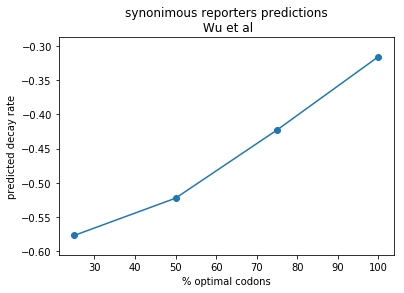

In [6]:
plt.scatter(data_fi3bcd_wu_et_al.p_optimal, data_fi3bcd_wu_et_al.predicted_stability)
plt.plot(data_fi3bcd_wu_et_al.p_optimal, data_fi3bcd_wu_et_al.predicted_stability)
plt.xlabel('% optimal codons')
plt.ylabel('predicted decay rate')
plt.title('synonimous reporters predictions\n Wu et al')
plt.savefig('synonimus_reporters_wu_et_al.pdf');

In [7]:
## load experimental validation result
experiments = pd.read_excel("silent_reporter_q_experiment_quants.xlsx")
experiments.head()
experiments['p_optimal'] = [100, 75, 50, 25]
experiments.index = range(4)
experiments

,RNA,protein,p_optimal
0,1.00,1.699052,100
1,0.84,0.774905,75
2,0.67,0.335277,50
3,0.25,0.191280,25


In [8]:
results = pd.merge(data_fi3bcd_wu_et_al, experiments, on='p_optimal')

In [9]:
results

,p_optimal,seqs,predicted_stability,RNA,protein
0,100,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.315820,1.00,1.699052
1,75,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.422969,0.84,0.774905
2,50,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.522531,0.67,0.335277
3,25,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.576966,0.25,0.191280


In [10]:
results.to_csv("results_data/predict_silent_reporters.csv", index=False)

***

# Can we optimized the silent reporters?

## Overview

+ Where does the optimization with IDT falls?
+ Can the method be better than the optimization done by Ariel and Q?


From here, I only work with the sequence of the silent reporter (not included the sequence of the mCherry).


I optimized the 50 % optimal silent reporter with idt. The found sequence by idt is in the file: `results_data/silent_reporters_seqs.csv`. Below I run the optimization with my algorithm.

In [11]:
"""50% silent reporter optimization"""
# params
mdl_path = '../19-04-30-PredictiveModelDecayAllSpecies/19-05-01-TrainModels/results_data/final_model_gbm.joblib'
n_iterations = 250 # set to 500
# optimize human gene that is midl stable in RPE

gene_name = "silent_optimized_mdl"

# the optimization starts from the silent reporter with 50% optimal codons
seq = "AGACACCAATCCTTCTGCGACGAGGTATTTGTCTGCAGTGATGAGCTCAAAGTCGAACTCTCCAAATGTCCCTGTAAGTATATCAGTCCACACAACCCCGAACCACAAACGTTAACGTACAACAAGAGAGTAGACAATTTACGCATACAGTTTCAGCGCTTCACAATCATAACAGATAATTACCATTATCATAGAGAATCCCACGATCATACGAAAGTATTAGACCTCGTCAACTTTGAGATCGATGAAACGCAAAGTGACAATTGTAAGCAGCATTGCTATATACAGCGCAGTTATGTCAGAATAAACGAGTCCAAGAATCCACGCCCCACAATCTTTTTCTACTTCCCACACTGTCTCGTACCCCAAACATGCTACAAATTAAGAACGTGTTTTTGTGATGACGAGGTACCCGAAGTAAGTAAATGCGTCCCCTATCCATGCATCTCCAATGACCAGCTCCATAAGAGAACATTATACGATCACCATTTCGAAATCCACTACCCACAAAATGTCTATACGGAGAAGCAAAAAAGTCGCCAGAACATATTTCGCACACTCATATCCTTCTTAAACAGAGACAAAACGCAAAATGTCAATAGAGAACGCTGTAACAACCACAGTCAACCACCCAAAGAGAAGGATGAATTACACCCACCCTTTATCTATATAACATCCTGCTTCCTCAAGTACCGCCATGAGTTCGATTGCTGTTTTCAGGACATCCAGCTCATACATGTA"


# optimize gene in rpe
mdl_params = {'specie': 'human', 'cell_type': '293t',
              'datatype': 'endogenous'}
search_path = protein_optimization(
    seq, mdl_path, mdl_params, crossover_args={}, niterations=n_iterations)

search_path.to_csv('results_data/silentReporter_optimization_path.csv')


iteration 1 of 250
iteration 2 of 250
iteration 3 of 250
iteration 4 of 250
iteration 5 of 250
iteration 6 of 250
iteration 7 of 250
iteration 8 of 250
iteration 9 of 250
iteration 10 of 250
iteration 11 of 250
iteration 12 of 250
iteration 13 of 250
iteration 14 of 250
iteration 15 of 250
iteration 16 of 250
iteration 17 of 250
iteration 18 of 250
iteration 19 of 250
iteration 20 of 250
iteration 21 of 250
iteration 22 of 250
iteration 23 of 250
iteration 24 of 250
iteration 25 of 250
iteration 26 of 250
iteration 27 of 250
iteration 28 of 250
iteration 29 of 250
iteration 30 of 250
iteration 31 of 250
iteration 32 of 250
iteration 33 of 250
iteration 34 of 250
iteration 35 of 250
iteration 36 of 250
iteration 37 of 250
iteration 38 of 250
iteration 39 of 250
iteration 40 of 250
iteration 41 of 250
iteration 42 of 250
iteration 43 of 250
iteration 44 of 250
iteration 45 of 250
iteration 46 of 250
iteration 47 of 250
iteration 48 of 250
iteration 49 of 250
iteration 50 of 250
iteration

In [12]:
search_path

,iteration,sequences,fitness,optimization,human | 293t | endogenous,fish | embryo mzt | aamanitin polya,mouse | mES cells | slam-seq,human | RPE | endogenous
0,0,AGACACCAATCCTTCTGCGACGAGGTATTTGTCTGCAGTGATGAGC...,-0.626016,minimization,-0.626016,-0.918560,-0.606274,-0.657703
1,0,AGACACCAATCCTTCTGCGACGAGGTATTTGTTTGCAGTGATGAGC...,-0.718918,minimization,-0.718918,-0.994953,-0.688326,-0.716772
2,0,AGACACCAATCCTTCTGCGACGAGGTATTTGTCTGCAGTGATGAGC...,-0.558213,minimization,-0.558213,-0.924353,-0.640404,-0.635443
3,0,AGACACCAATCCTTCTGCGACGAGGTATTTGTCTGCAGTGATGAGC...,-0.754914,minimization,-0.754914,-1.032545,-0.750913,-0.708646
4,0,AGACACCAATCCTTCTGCGACGAGGTATTTGTCTGCAGTGATGAGC...,-0.780048,minimization,-0.780048,-1.033465,-0.718116,-0.757780
5,0,AGACACCAATCCTTCTGCGACGAGGTATTTGTCTGCTCTGATGAGC...,-0.637175,minimization,-0.637175,-0.945079,-0.619184,-0.657262
6,0,AGACACCAATCCTTCTGCGACGAGGTATTTGTCTGCAGTGATGAGC...,-0.602419,minimization,-0.602419,-0.911896,-0.607563,-0.649581
7,0,AGACACCAATCCTTCTGCGACGAGGTATTTGTCTGCAGTGATGAGC...,-0.700498,minimization,-0.700498,-0.974964,-0.692873,-0.712089
8,0,AGACACCAATCCTTCTGCGACGAGGTATTTGTGTGCAGTGATGAGC...,-0.667543,minimization,-0.667543,-0.979448,-0.674375,-0.698296
9,0,AGACACCAATCCTTCTGCGACGAGGTATTTGTCTGCAGTGATGAGC...,-0.632723,minimization,-0.632723,-0.946404,-0.667054,-0.641854


In [13]:
# silent_suprema 
silent_suprema = search_path[search_path.fitness == max(search_path.fitness)].sequences.values[0]
silent_infima = search_path[search_path.fitness == min(search_path.fitness)].sequences.values[0]

In [14]:
# now make data set with the silent reporter sequences:

silent_reps = {
    'id_seq' : ['opt_100', 'opt_75', 'opt_50', 'opt_25', 'suprema', 'infima', 'idt'],
    'seqs' : [
        'CGCCACCAGTCCTTCTGCGACGAGGTCTTCGTCTGCTCCGACGAGCTCAAGGTCGAACTCTCCAAGTGCCCCTGCAAGTACATCTCCCCCCACAACCCCGAACCCCAGACGCTCACGTACAACAAGCGCGTCGACAACCTCCGCATCCAGTTCCAGCGCTTCACGATCATCACGGACAACTACCACTACCACCGCGAATCCCACGACCACACGAAGGTCCTCGACCTCGTCAACTTCGAGATCGACGAAACGCAGTCCGACAACTGCAAGCAGCACTGCTACATCCAGCGCTCCTACGTCCGCATCAACGAGTCCAAGAACCCCCGCCCCACGATCTTCTTCTACTTCCCCCACTGCCTCGTCCCCCAGACGTGCTACAAGCTCCGCACGTGCTTCTGCGACGACGAGGTCCCCGAAGTCTCCAAGTGCGTCCCCTACCCCTGCATCTCCAACGACCAGCTCCACAAGCGCACGCTCTACGACCACCACTTCGAAATCCACTACCCCCAGAACGTCTACACGGAGAAGCAGAAGTCCCGCCAGAACATCTTCCGCACGCTCATCTCCTTCCTCAACCGCGACAAGACGCAGAACGTCAACCGCGAACGCTGCAACAACCACTCCCAGCCCCCCAAGGAGAAGGACGAACTCCACCCCCCCTTCATCTACATCACGTCCTGCTTCCTCAAGTACCGCCACGAGTTCGACTGCTGCTTCCAGGACATCCAGCTCATCCACGTC',
        'AGACACcagTCCTTCTGCGACGAGGTAttcGTCTGCAGTgacGAGCTCAAAGTCGAACTCTCCaagTGTCCCtgcAAGTATATCtccCCACACAACCCCGAAcccCAAACGctcACGTACAACAAGAGAgtcGACAATctcCGCATACAGttcCAGCGCTTCACAATCatcACAGATAATTACcacTATcacAGAGAATCCCACgacCATACGaagGTActcGACCTCGTCAACTTTGAGATCgacGAAACGCAAtccGACAATtgcAAGCAGCATTGCtacATACAGCGCtccTATGTCcgcATAAACGAGTCCAAGaacCCACGCCCCacgATCTTTTTCTACTTCcccCACTGTCTCgtcCCCCAAacgTGCTACAAActcAGAACGtgcTTTtgcGATGACGAGgtcCCCGAAGTAtccAAATGCgtcCCCtacCCATGCATCTCCaacGACCAGCTCCATAAGcgcACActcTACGATCACcacTTCGAAATCCACTACCCAcagAATGTCtacACGGAGAAGCAAaagAGTCGCCAGAACatcTTTCGCacgCTCATATCCTTCctcAACAGAGACaagACGCAAaacGTCAATcgcGAACGCTGTAACAACCACtccCAACCACCCAAAGAGAAGgacGAATTACACcccCCCTTTATCtacATAacgTCCTGCTTCCTCAAGTACCGCCATGAGTTCgacTGCTGTttcCAGGACATCCAGCTCATAcacGTA',
        'AGACACCAATCCTTCTGCGACGAGGTATTTGTCTGCAGTGATGAGCTCAAAGTCGAACTCTCCAAATGTCCCTGTAAGTATATCAGTCCACACAACCCCGAACCACAAACGTTAACGTACAACAAGAGAGTAGACAATTTACGCATACAGTTTCAGCGCTTCACAATCATAACAGATAATTACCATTATCATAGAGAATCCCACGATCATACGAAAGTATTAGACCTCGTCAACTTTGAGATCGATGAAACGCAAAGTGACAATTGTAAGCAGCATTGCTATATACAGCGCAGTTATGTCAGAATAAACGAGTCCAAGAATCCACGCCCCACAATCTTTTTCTACTTCCCACACTGTCTCGTACCCCAAACATGCTACAAATTAAGAACGTGTTTTTGTGATGACGAGGTACCCGAAGTAAGTAAATGCGTCCCCTATCCATGCATCTCCAATGACCAGCTCCATAAGAGAACATTATACGATCACCATTTCGAAATCCACTACCCACAAAATGTCTATACGGAGAAGCAAAAAAGTCGCCAGAACATATTTCGCACACTCATATCCTTCTTAAACAGAGACAAAACGCAAAATGTCAATAGAGAACGCTGTAACAACCACAGTCAACCACCCAAAGAGAAGGATGAATTACACCCACCCTTTATCTATATAACATCCTGCTTCCTCAAGTACCGCCATGAGTTCGATTGCTGTTTTCAGGACATCCAGCTCATACATGTA',
        'AGACACCAAagtTTCtgtGACgaaGTATTTGTCtgtAGTGATGAGttaAAAGTCGAACTCagtAAATGTCCCTGTaaaTATATCAGTCCAcatAACccaGAACCACAAacaTTAACGtatAACaaaAGAGTAGACAATTTAagaATACAGTTTCAGagaTTCACAataATAACAGATAATTACCATTATCATAGAGAATCCcatGATCATACGAAAGTATTAgatCTCGTCAACTTTgaaATCGATGAAACGCAAAGTgatAATTGTAAGcaaCATTGCTATATAcaaCGCAGTTATgtaAGAATAAACgaaTCCaaaAATCCACGCccaACAATCTTTtttTACtttCCACACTGTttaGTACCCCAAACAtgtTACAAATTAAGAacaTGTTTTTGTGATGACgaaGTACCCGAAGTAAGTAAATGCgtaCCCTATCCAtgtATCagtAATGACcaaCTCCATaaaAGAACATTATACGATcatCATTTCGAAataCACtatCCACAAAATGTCTATacaGAGaaaCAAAAAAGTCGCcaaAACATATTTCGCACAttaATATCCtttTTAAACAGAgatAAAACGCAAAATgtaAATAGAGAAagaTGTAACaatCACAGTCAACCAccaAAAGAGaaaGATGAATTAcatCCACCCTTTataTATATAACATCCtgtTTCttaAAGTACCGCCATgaaTTCGATtgtTGTTTTCAGgatATCcaaCTCATACATGTA',
        silent_suprema,
        silent_infima,
        'AGACATCAATCTTTTTGCGATGAAGTCTTTGTATGTTCCGACGAACTTAAGGTGGAACTCAGTAAATGTCCTTGTAAATACATTTCCCCCCACAATCCTGAACCGCAGACATTGACATACAATAAGCGGGTGGATAATCTCAGGATCCAGTTCCAGAGGTTCACAATCATAACAGATAATTATCACTATCACCGGGAAAGCCACGACCACACTAAAGTTCTTGATTTGGTGAATTTTGAAATTGACGAGACCCAAAGCGATAACTGTAAACAACATTGTTATATCCAACGGTCCTATGTTCGCATAAATGAATCTAAAAACCCTCGGCCAACCATCTTTTTCTACTTTCCGCATTGTCTCGTCCCGCAAACGTGTTATAAGCTGCGAACGTGCTTTTGCGACGATGAGGTGCCAGAGGTATCAAAGTGTGTACCTTATCCCTGCATCAGCAATGACCAACTGCACAAAAGAACCCTCTATGATCACCATTTTGAGATCCATTATCCTCAAAATGTCTACACTGAAAAGCAGAAGTCCCGACAAAATATCTTTAGAACCCTGATATCATTCCTCAACAGGGATAAGACTCAAAACGTTAACCGCGAACGATGCAACAATCATAGCCAGCCTCCAAAAGAAAAGGACGAACTGCATCCACCTTTTATCTACATCACATCATGTTTCCTCAAGTATAGACACGAGTTCGATTGTTGTTTCCAAGACATCCAGCTCATTCATGTA'
    ]
}

silent_reps = pd.DataFrame(silent_reps)

# predit mRNA stability in 293t human

silent_reps['predicted_stability_human293t'] = silent_reps.seqs.apply(predict_sequence, mdl=mdl, **mdl_params)

In [15]:
silent_reps.to_csv("results_data/silent_reporters_seqs.csv")


***
# Predict GFPs

In [16]:
gfp_data = {
    'seq_id': ['neutralGFP', 'eGFP', 'supremaGFP', 'infimaGFP'],
    'seqs': [
        'atgtcaaaaggagaagaacttttcacaggggttgttccaatacttgttgaacttgatggggatgttaatgggcataaattctcagtttcaggagaaggagaaggagaagcgacatatgggaaacttacacttaaattcatatgtacaacagggaaacttccagttccatggccaacacttgttacaacacttacatatggagttcaatgtttctcaagatatccagatcatatgaaacaacatgatttcttcaaatcagcaatgccagaaggatatgttcaagaaagaacaatattcttcaaagatgatgggaattataaaacaagagctgaagttaaatttgaaggggatacacttgttaatagaattgaacttaaaggaattgaatttaaagaagatgggaatatacttgggcataaacttgaatataattataattcacataatgtttatattatggcagataaacaaaaaaatgggattaaagttaattttaaaattagacataatattgaagatgggtcagttcaacttgcagatcattatcaacaaaatacaccaattggggatgggccagttcttcttccagataatcattatctttcaacacaatcagcgctttcaaaagaaccaaatgaaaaaagagatcatatggttcttcttgaatttgttacagcagcagggattacacatgggatggatgaactttacaaaggaagctga',
        'ATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAGCTGGACGGCGACGTAAACGGCCACAAGTTCAGCGTGTCCGGCGAGGGCGAGGGCGATGCCACCTACGGCAAGCTGACCCTGAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGACCTACGGCGTGCAGTGCTTCAGCCGCTACCCCGACCACATGAAGCAGCACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGCGCACCATCTTCTTCAAGGACGACGGCAACTACAAGACCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTGGTGAACCGCATCGAGCTGAAGGGCATCGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTACAACAGCCACAACGTCTATATCATGGCCGACAAGCAGAAGAACGGCATCAAGGTGAACTTCAAGATCCGCCACAACATCGAGGACGGCAGCGTGCAGCTCGCCGACCACTACCAGCAGAACACCCCCATCGGCGACGGCCCCGTGCTGCTGCCCGACAACCACTACCTGAGCACCCAGTCCGCCCTGAGCAAAGACCCCAACGAGAAGCGCGATCACATGGTCCTGCTGGAGTTCGTGACCGCCGCCGGGATCACTCTCGGCATGGACGAGCTGTACAAG',
        'ATGGTGTCTAAAGGCGAGGAGCTGTTCACCGGGGTGGTGCCTATCCTGGTCGAGCTGGACGGAGACGTAAACGGCCATAAATTCAGCGTGAGCGGCGAAGGCGAGGGTGATGCAACCTACGGGAAGTTGACCCTGAAATTCATCTGCACCACCGGCAAGCTGCCAGTGCCTTGGCCAACCCTCGTGACAACCCTTACCTATGGGGTACAGTGTTTTTCACGTTACCCGGACCATATGAAGCAGCACGACTTCTTCAAGTCCGCTATGCCCGAGGGCTATGTCCAGGAGCGCACCATCTTCTTCAAGGATGATGGCAACTATAAGACACGGGCCGAGGTGAAGTTCGAAGGTGACACCCTGGTTAATCGTATCGAGCTGAAGGGAATCGATTTCAAGGAGGACGGCAATATTCTGGGGCACAAGTTGGAGTACAACTACAATTCTCACAACGTATACATCATGGCTGACAAGCAGAAGAATGGCATCAAAGTAAATTTCAAGATCCGGCACAACATTGAGGACGGGAGTGTCCAGCTGGCAGACCACTACCAGCAGAACACACCAATCGGAGACGGCCCCGTTCTGCTACCGGATAACCACTACCTGTCGACCCAGTCCGCCCTGAGTAAAGATCCGAATGAGAAGCGCGACCATATGGTCCTCCTGGAGTTTGTGACCGCCGCCGGGATCACACTCGGCATGGACGAGCTGTACAAG',
        'ATGGTTAGTAAAGGCGAAGAACTGTTTACTGGGGTCGTCCCGATTTTGGTTGAGTTAGACGGGGATGTTAATGGGCACAAATTTTCAGTTAGTGGTGAGGGGGAGGGGGACGCGACGTACGGCAAACTAACTCTTAAATTTATCTGCACCACAGGGAAATTACCGGTTCCGTGGCCCACTCTTGTCACTACGCTGACGTACGGGGTCCAATGCTTTTCGCGCTATCCTGACCACATGAAACAACATGATTTCTTCAAATCGGCGATGCCGGAGGGCTACGTCCAAGAGCGTACTATATTCTTCAAAGATGACGGAAACTACAAAACGCGCGCGGAAGTTAAATTTGAAGGGGATACGCTTGTCAACCGCATCGAACTGAAGGGGATAGATTTCAAAGAAGATGGTAACATACTTGGGCATAAACTAGAGTACAACTACAATTCGCATAACGTTTACATAATGGCGGACAAACAAAAAAATGGGATAAAAGTCAATTTCAAAATTCGCCATAACATTGAGGACGGTAGTGTTCAGCTCGCTGACCACTATCAACAAAACACTCCAATAGGCGACGGTCCCGTGTTGTTGCCGGACAATCACTACCTATCGACTCAGTCGGCGTTAAGTAAAGACCCAAATGAGAAACGCGACCATATGGTATTATTAGAGTTTGTTACTGCGGCAGGGATTACTTTAGGCATGGACGAATTATACAAG'
    ]
}

gfp_data = pd.DataFrame(gfp_data)
gfp_data['predicted_stability_human293t'] = gfp_data.seqs.apply(predict_sequence, mdl=mdl, **mdl_params)
gfp_data.to_csv("results_data/gfp_sequences_predictions.csv")